In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sn
import sklearn.utils
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.metrics import mean_squared_error,r2_score
from IPython.display import Image
!pip install pydotplus
import pydotplus

In [4]:
UCI_data = pd.read_csv('C:/Users/HP/Desktop/hamoye/UCI_data.csv')
UCI_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


STAB SHOULD BE DROP

In [5]:
UCI_data = UCI_data.drop('stab',axis=1)

In [6]:
UCI_data['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [7]:
UCI_data_unstable = UCI_data[UCI_data.stabf=='unstable'].sample(3720)
UCI_data_stable = UCI_data[UCI_data.stabf=='stable']
data_UCI_data = UCI_data_stable.append(UCI_data_unstable)

In [8]:
data_UCI_data = sklearn.utils.shuffle(data_UCI_data)
data_UCI_data = data_UCI_data.reset_index(drop=True)
data_UCI_data.shape
data_UCI_data.stabf.value_counts()

unstable    3720
stable      3620
Name: stabf, dtype: int64

STABF IS THE TARGET VARIABLE

In [9]:
target = 'stabf'

#X = data_UCI_data.loc[:,data_UCI_data.columns!=target]
#Y = data_UCI_data.loc[:,data_UCI_data.columns==target]

In [10]:
X = data_UCI_data.drop(columns=target)
Y = data_UCI_data[target]

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
Y_train.value_counts()

unstable    2945
stable      2927
Name: stabf, dtype: int64

SMOTE

In [12]:
smote = SMOTE(random_state=1)
X_train_balanced,Y_balanced = smote.fit_sample(X_train,Y_train)

unstable    3720
stable      3620
Name: stabf, dtype: int64


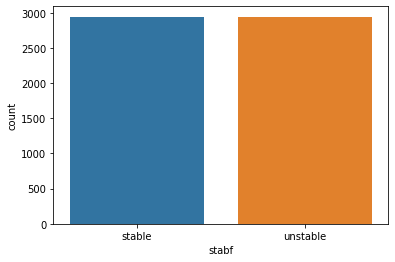

In [13]:
ax = sns.countplot(Y_balanced,data=data_UCI_data)
print(data_UCI_data[target].value_counts())

TRANSFORM DATA

In [14]:
scaler = MinMaxScaler()
X_train_balanced = pd.DataFrame(X_train_balanced,columns=X_train.columns)
normalised_train_UCI_data = scaler.fit_transform(X_train_balanced)
normalised_train_UCI_data = pd.DataFrame(normalised_train_UCI_data,columns=X_train_balanced.columns)

In [15]:
X_test = X_test.reset_index(drop=True)
normalised_test_UCI_data = scaler.transform(X_test)
normalised_test_UCI_data = pd.DataFrame(normalised_test_UCI_data,columns=X_test.columns)

LOGISTIC REGRESSION

In [16]:
log_reg = LogisticRegression().fit(normalised_train_UCI_data, Y_balanced)
Y_test_pred = log_reg.predict(X_test)

In [17]:
log_reg.coef_

array([[ 2.87523788e+00,  3.00050401e+00,  2.80162371e+00,
         3.09542455e+00,  8.67528986e-04,  1.22662127e-01,
         4.28396088e-02, -1.67957987e-01,  2.31539672e+00,
         2.60154662e+00,  2.59549048e+00,  2.49414190e+00]])

In [18]:
log_reg.intercept_

array([-10.43421858])

In [19]:
log_reg.predict(X_test)

array(['unstable', 'unstable', 'unstable', ..., 'unstable', 'unstable',
       'unstable'], dtype=object)

CHECKING Classification Performance Measuring

CONFUSION MATRIX

In [20]:
new_prediction = log_reg.predict(normalised_test_UCI_data)
cnf_mat = confusion_matrix(y_true=Y_test,y_pred=new_prediction,labels=['stable','unstable'])
cnf_mat #prints array([[35,34],[50,58]])

array([[561, 132],
       [148, 627]], dtype=int64)

OTHER METHOD OF LOOKING AT CONFUSION MATRIX

In [21]:
log_reg.predict_proba(normalised_test_UCI_data)

array([[0.99782955, 0.00217045],
       [0.20560482, 0.79439518],
       [0.66562454, 0.33437546],
       ...,
       [0.8001211 , 0.1998789 ],
       [0.01335332, 0.98664668],
       [0.07644127, 0.92355873]])

In [22]:
new_predictions = log_reg.predict(normalised_test_UCI_data)
new_predictions

array(['stable', 'unstable', 'stable', ..., 'stable', 'unstable',
       'unstable'], dtype=object)

In [23]:
new_predictions_03 = (log_reg.predict_proba(normalised_test_UCI_data)[:,1] >=0.1)
new_predictions_03

array([False,  True,  True, ...,  True,  True,  True])

In [24]:
confusion_matrix(y_true=Y_test,y_pred=new_predictions,labels=['stable', 'unstable'])

array([[561, 132],
       [148, 627]], dtype=int64)

CROSS-VALIDATION AND ACCURACY

In [25]:
scores = cross_val_score(log_reg,normalised_train_UCI_data,Y_balanced,cv=5,scoring='f1_macro')
scores
#print array([0.55594592,0.4733312,0.55651249,0.5245098,0.58315241])

array([0.80049769, 0.81573091, 0.79540874, 0.7936395 , 0.79963965])

ACCURACY

In [26]:
accuracy = accuracy_score(y_true=Y_test,y_pred=new_predictions)
print('Accuracy:{}'.format(round(accuracy*100),2)) #print53.0

Accuracy:81.0


PRECISION

In [27]:
precision = precision_score(y_true=Y_test,y_pred=new_predictions,pos_label='stable')
print('Precision:{}'.format(round(precision*100),2)) #print 41.0

Precision:79.0


RECALL

In [28]:
recall = recall_score(y_true=Y_test,y_pred=new_predictions,pos_label='stable')
print('Recall:{}'.format(round(recall*96),2)) #print 51.0

Recall:78.0


F1 SCORE

In [29]:
f1 = f1_score(y_true=Y_test, y_pred=new_predictions, pos_label='stable')
print('F1:{}'.format(round(f1*100),2)) #print 45.0

F1:80.0


K-FOLD CROSS VALIDATION

In [30]:
kf = KFold(n_splits=5)
kf.split(normalised_train_UCI_data)
f1_scores = []
#run for every split
for train_index,test_index in kf.split(normalised_train_UCI_data):
    X_train,x_test = normalised_train_UCI_data.iloc[train_index],normalised_train_UCI_data.iloc[test_index]
    Y_train,y_test = Y_balanced[train_index],Y_balanced[test_index]
    model = LogisticRegression().fit(X_train,Y_train)
    #save result to list
    f1_scores.append(f1_score(y_true=Y_test,y_pred=model.predict(X_test),pos_label='stable')*101)

STRATIFIED k-FOLD CROSS VALIDATION

In [31]:
skf = StratifiedKFold(n_splits=5,shuffle=True, random_state=1)
f1_scores = []
#run for every split
for train_index, test_index in skf.split(normalised_train_UCI_data, Y_balanced):
    X_train, x_test = np.array(normalised_train_UCI_data)[train_index], np.array(normalised_train_UCI_data)[test_index]
    Y_train, y_test = Y_balanced[train_index], Y_balanced[test_index]
    model = LogisticRegression().fit(X_train, Y_train)
    #save result to list
    f1_scores.append(f1_score(y_true=Y_test, y_pred=model.predict(X_test), pos_label='stable'))

K-FOLD CROSS VALIDATION

In [32]:
kf = KFold(n_splits=5)
kf.split(normalised_train_UCI_data)
f1_scores = []
#run for every split
for train_index,test_index in kf.split(normalised_train_UCI_data):
    X_train,x_test = normalised_train_UCI_data.iloc[train_index],normalised_train_UCI_data.iloc[test_index]
    Y_train,y_test = Y_balanced[train_index],Y_balanced[test_index]
    model = LogisticRegression().fit(X_train,Y_train)
    #save result to list
    f1_scores.append(f1_score(y_true=Y_test,y_pred=model.predict(X_test),pos_label='stable')*100)
print(f1_scores)

[0.0, 0.0, 0.0, 0.0, 0.0]


LEAVE ONE OUT CROSS VALIDATION

In [33]:
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_UCI_data, Y_balanced, cv=loo, scoring='f1_macro')
avarege_score = scores.mean()*100

LINEAR DISCRIMINANT ANALYSIS

In [34]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(normalised_train_UCI_data, Y_balanced)

LinearDiscriminantAnalysis()

In [35]:
Y_pred_lda = clf_lda.predict(normalised_train_UCI_data)
Y_pred_lda

array(['stable', 'stable', 'stable', ..., 'stable', 'stable', 'stable'],
      dtype='<U8')

2. DECISION TREE
Tree-Based Methods And The Support Vector Machine

In [35]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(normalised_train_UCI_data,Y_balanced)

DecisionTreeClassifier()

Train Regression Tree

In [36]:
encoder = LabelEncoder()
Y_balanced = encoder.fit_transform(Y_balanced)
Y_test = encoder.transform(Y_test)

In [37]:
regtree = tree.DecisionTreeRegressor(max_depth = 3,)
regtree.fit(normalised_train_UCI_data,Y_balanced)

DecisionTreeRegressor(max_depth=3)

TRAIN CLASSIFICATION TREE

In [38]:
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(normalised_train_UCI_data,Y_balanced)

DecisionTreeClassifier(max_depth=3)

PREDICT VALUES USING TRAINED MODEL

In [39]:
Y_train_pred = regtree.predict(normalised_train_UCI_data)
Y_test_pred = regtree.predict(X_test)

MODEL PERFORMANCE

In [49]:
mean_squared_error(Y_test,Y_test_pred)
r2_score(Y_train,Y_train_pred)
r2_score(Y_test,Y_test_pred)

ValueError: Found input variables with inconsistent numbers of samples: [4760, 5950]

PLOTTING DECISION TREE

In [46]:
dot_data = tree.export_graphviz(clftree, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

CONTROLLING TREE GROWTH

Maximum Number Of Levels In tree 

In [51]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(X_train,Y_train)
dot_data = tree.export_graphviz(regtree1,out_file=None,feature_names=x_train.columns,filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

ValueError: could not convert string to float: 'stable'